In [1]:
##dependencies
## in linux terminal
## sudo apt-get install python-pip
#sudo pip install numpy
#sudo pip install pandas
#sudo pip install urllib

import numpy as np
import pandas as pd
import datetime
import urllib
 
 
# Read in our data and limit it to 50000 rows. 
query = ("https://data.cityofchicago.org/resource/6zsd-86xi.json?$limit=500000")
raw_data = pd.read_json(query)

In [2]:
#making the data categorical
print('Making training a categorical structure...') 
#week = pd.get_dummies(train.Date.map(lambda x: pd.to_datetime(x).week), prefix="week")
months = pd.get_dummies(raw_data.date.map(lambda x: pd.to_datetime(x).month), prefix="month")
years = pd.get_dummies(raw_data.date.map(lambda x: pd.to_datetime(x).year), prefix="year")
area = pd.get_dummies(raw_data["community_area"])
print('Train cleaning...')
feature_data = pd.concat([months,area,years], axis=1)
#train = train.drop(['Primary Type','District', 'Date','ID','Year'], axis = 1)
print ('Done')


Making training a categorical structure...
Train cleaning...
Done


In [3]:
#using the primary type of crime as our category
category = pd.get_dummies(raw_data["primary_type"])

#making a dataframe of all the types of theft
category_theft=pd.DataFrame(category,columns=['BURGLARY','THEFT','ROBBERY','MOTOR VEHICLE THEFT'])


In [4]:
#display of categorical data 1 means the crime has occured
category

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
category_theft=category_theft.sum(axis=1)

In [11]:
#Merging dataframe of type of theft and feature data
theft_data=pd.concat([category_theft,feature_data],axis=1)

In [12]:
theft_data

,0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##splitting the data into train and test

In [13]:
#Train data
data1_train=theft_data[:300000]

#test data
data1_test=theft_data.tail(200000)

In [14]:
data1_train

,0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
data1_test

,0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
300000,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300002,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300003,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300004,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300005,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300006,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300007,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300008,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300009,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_label=category_theft[:300000]

In [17]:
test_actual=category_theft.tail(200000)

In [19]:
#setting up our training features
train_features=data1_train.drop(0,axis=1)

In [20]:
train_features

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:

test=data1_test.drop(0,axis=1)

In [22]:
Features=train_features
Labels = train_label

In [19]:
#building up an XGBClassifier using scikit learn
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


from sklearn import model_selection
from sklearn.metrics import accuracy_score


In [20]:
#XGB Model
model = xgb.XGBClassifier( )
result2=model.fit(Features, Labels).predict(test)

In [21]:
#Accuracy of XGB
from sklearn.metrics import accuracy_score
y_pred= result2
y_true=test_actual
accuracy_score(y_true, y_pred)

0.66834499999999997

In [20]:
#Bulding an SVM Model for the above data
from sklearn import svm

In [ ]:
#SVC Model
linear_svc = svm.SVC(kernel='rbf')
result_svm=linear_svc.fit(Features, Labels).predict(test)
y_pred= result_svm
y_true=test_actual
accuracy_score(y_true, y_pred)

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
#Building an MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
result_nn=clf.fit(Features,Labels).predict(test)

In [26]:
#MLPC accuracy check
y_pred= result_nn
y_true=test_actual
accuracy_score(y_true, y_pred)


0.66342000000000001

In [27]:
#making narcotics as primary type

In [23]:
cate_n= category['NARCOTICS']

In [24]:
train_narc=data1_train.drop(0,axis=1)
train_ln=cate_n[:300000]
test_narc=cate_n.tail(200000)
Features_n=train_narc
Labels_n = train_ln

In [6]:
##XGBClassifier for narcotics

In [32]:

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


from sklearn import model_selection
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier( )
result_n=model.fit(Features_n, Labels_n).predict(test_narc)
from sklearn.metrics import accuracy_score
y_pred= result_n
y_true=test_narc
accuracy_score(y_true, y_pred)

0.89229999999999998

In [25]:
## DATA VISUALIZATION

In [28]:
import pandas as pd
import numpy as np 
df_train = pd.read_csv("/home/adarsh/Desktop/Crimes_-_2001_to_present.csv",nrows=3500000)
df_test = pd.read_csv("/home/adarsh/Desktop/Crimes_-_2001_to_present.csv" ,skiprows=range(1,4000000),nrows=2000000,header=0)

In [29]:
df_train

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5114532,HM714731,10/31/2006 12:00:00 PM,104XX S OGLESBY AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,10.0,51.0,06,1193865.0,1836359.0,2006,04/15/2016 08:55:02 AM,41.705909,-87.565686,"(41.705908708, -87.565686199)"
1,5114533,HM715052,11/11/2006 04:30:00 PM,008XX W 31ST ST,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,OTHER,False,False,...,11.0,60.0,11,1171374.0,1884321.0,2006,04/15/2016 08:55:02 AM,41.838043,-87.646644,"(41.838042874, -87.646643852)"
2,5114534,HM713992,11/11/2006 03:00:00 AM,038XX N LAVERGNE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,45.0,15.0,08B,1142346.0,1925021.0,2006,04/15/2016 08:55:02 AM,41.950316,-87.752151,"(41.9503159, -87.752150576)"
3,5114536,HM710244,11/09/2006 07:00:00 AM,012XX W 86TH ST,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,False,...,21.0,71.0,03,1169410.0,1847751.0,2006,04/15/2016 08:55:02 AM,41.737733,-87.654910,"(41.737733377, -87.654909531)"
4,5114537,HM187622,02/18/2006 06:55:00 AM,013XX W TOUHY AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,49.0,1.0,05,1166012.0,1947969.0,2006,04/15/2016 08:55:02 AM,42.012813,-87.664498,"(42.012812575, -87.66449775)"
5,5114538,HM712571,11/10/2006 06:00:00 AM,082XX S DREXEL AVE,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,8.0,44.0,26,1183671.0,1850475.0,2006,04/15/2016 08:55:02 AM,41.744888,-87.602577,"(41.744887957, -87.602576616)"
6,5114539,HM715990,11/12/2006 06:31:00 AM,029XX W WALNUT ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE,True,False,...,2.0,27.0,04B,1156697.0,1901491.0,2006,04/15/2016 08:55:02 AM,41.885469,-87.700036,"(41.885468547, -87.700036019)"
7,5114540,HM709157,11/08/2006 10:50:00 AM,0000X E 112TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,9.0,49.0,07,1178522.0,1830715.0,2006,04/15/2016 08:55:02 AM,41.690782,-87.622041,"(41.690782361, -87.622041325)"
8,5114541,HM712630,11/10/2006 01:25:00 PM,112XX S WALLACE ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,"SCHOOL, PUBLIC, BUILDING",True,False,...,34.0,49.0,26,1174313.0,1830380.0,2006,04/15/2016 08:55:02 AM,41.689957,-87.637461,"(41.68995741, -87.637460623)"
9,5114542,HM715304,11/11/2006 07:27:34 PM,003XX W 60TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,20.0,68.0,14,1175027.0,1865166.0,2006,04/15/2016 08:55:02 AM,41.785399,-87.633812,"(41.78539884, -87.633811522)"


In [30]:
train1 = pd.DataFrame(df_train,columns = ['ID','Date','Primary Type','Community Area', 'Year']) 
test1 = pd.DataFrame(df_test,columns = ['ID','Date','Primary Type','Community Area']) 

In [31]:
cr1 = pd.DataFrame(train1['Primary Type'])
cr2 = pd.DataFrame(train1['Year'])
cr = cr1.merge(cr2, how = 'outer', left_index = True, right_index = True)
cr
cr11 = train1

In [32]:
years = [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

In [34]:
#uinque crimes

In [35]:
print(cr["Primary Type"].unique())

['THEFT' 'DECEPTIVE PRACTICE' 'BATTERY' 'ROBBERY' 'BURGLARY'
 'OTHER OFFENSE' 'MOTOR VEHICLE THEFT' 'CRIMINAL TRESPASS'
 'CRIMINAL DAMAGE' 'ASSAULT' 'SEX OFFENSE' 'OFFENSE INVOLVING CHILDREN'
 'KIDNAPPING' 'PUBLIC PEACE VIOLATION' 'CRIM SEXUAL ASSAULT' 'NARCOTICS'
 'WEAPONS VIOLATION' 'ARSON' 'INTIMIDATION' 'PROSTITUTION' 'GAMBLING'
 'LIQUOR LAW VIOLATION' 'INTERFERENCE WITH PUBLIC OFFICER' 'STALKING'
 'OBSCENITY' 'RITUALISM' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY'
 'HOMICIDE' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'CONCEALED CARRY LICENSE VIOLATION' 'NON - CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'DOMESTIC VIOLENCE']


In [36]:
# Check amount of unique values
print("Uniques:")
for column in cr.columns:
    print("Unique in '" + column + "': " + str(cr[column].nunique()))

Uniques:
Unique in 'Primary Type': 35
Unique in 'Year': 16


<IPython.core.display.Javascript object>


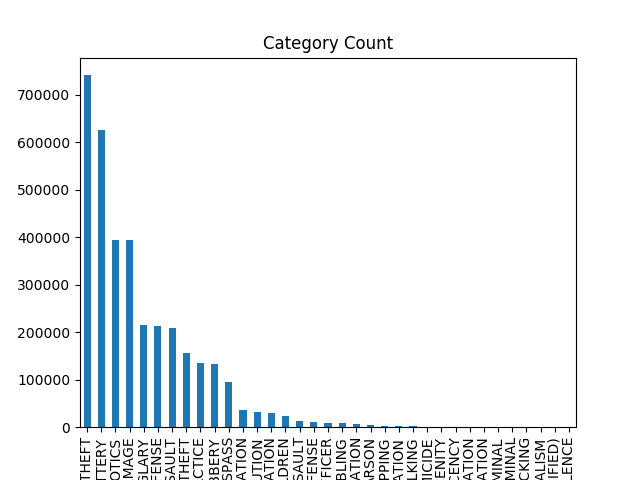

Primary Type
THEFT                                741135
BATTERY                              625128
NARCOTICS                            395158
CRIMINAL DAMAGE                      394692
BURGLARY                             216200
OTHER OFFENSE                        212507
ASSAULT                              209823
MOTOR VEHICLE THEFT                  157226
DECEPTIVE PRACTICE                   134530
ROBBERY                              133325
CRIMINAL TRESPASS                     94847
WEAPONS VIOLATION                     35760
PROSTITUTION                          32438
PUBLIC PEACE VIOLATION                29541
OFFENSE INVOLVING CHILDREN            23889
CRIM SEXUAL ASSAULT                   13792
SEX OFFENSE                           11816
INTERFERENCE WITH PUBLIC OFFICER       9310
GAMBLING                               8220
LIQUOR LAW VIOLATION                   7184
ARSON                                  5340
KIDNAPPING                             2926
INTIMIDATION       

In [37]:
# Amount of crimes per category
%matplotlib notebook
from matplotlib import pyplot as plt
groups = cr.groupby("Primary Type")["Primary Type"].count()
groups = groups.sort_values(ascending=0)
plt.figure()
groups.plot(kind='bar', title="Category Count")
print(groups)

<IPython.core.display.Javascript object>


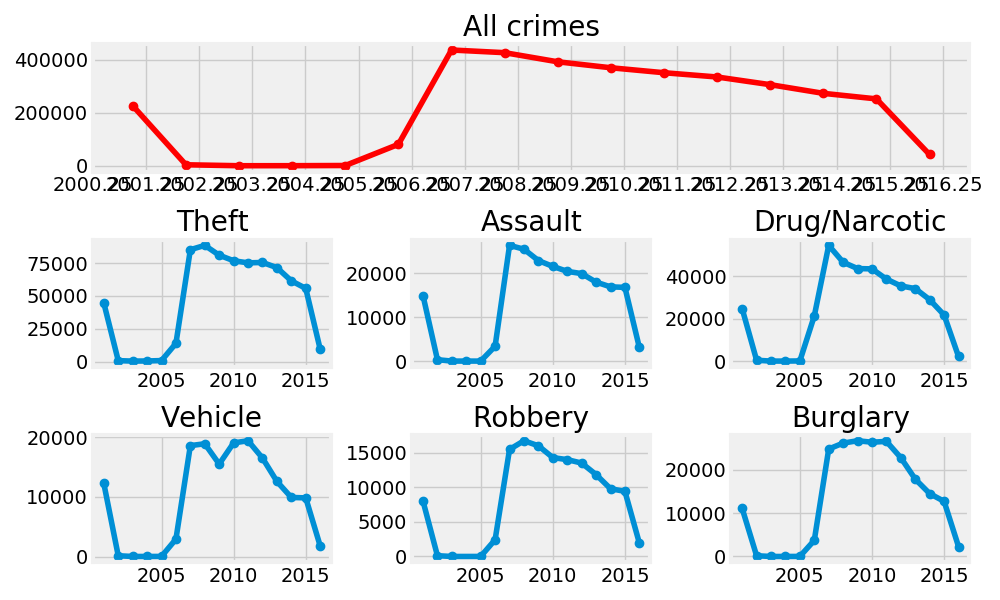

In [45]:
import pylab
import numpy as np
plt.figure()

pylab.rcParams['figure.figsize'] = (10.0, 6.0)

larceny = cr[cr['Primary Type'] == "THEFT"]
assault = cr[cr['Primary Type'] == "ASSAULT"]
drug = cr[cr['Primary Type'] == "NARCOTICS"]
vehicle = cr[cr['Primary Type'] == "MOTOR VEHICLE THEFT"]
robbery = cr[cr['Primary Type'] == "ROBBERY"]
burglary = cr[cr['Primary Type'] == "BURGLARY"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(cr.groupby('Year').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('Year').size(), 'o-')
    ax2.set_title ('Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Year').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('Year').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('Year').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(robbery.groupby('Year').size(), 'o-')
    ax6.set_title ('Robbery')
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('Year').size(), 'o-')
    ax7.set_title ('Burglary')
  
    pylab.gcf().text(10, 1.03, 
                    'Chicago Crime Occ0urence by Year',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 10)
    
plt.tight_layout(1)

plt.show()

In [39]:
zoro =pd.value_counts(cr['Year'].values, sort=False)

In [40]:
from collections import Counter
count = Counter(cr['Primary Type'])

count

Counter({'ARSON': 5340,
         'ASSAULT': 209823,
         'BATTERY': 625128,
         'BURGLARY': 216200,
         'CONCEALED CARRY LICENSE VIOLATION': 50,
         'CRIM SEXUAL ASSAULT': 13792,
         'CRIMINAL DAMAGE': 394692,
         'CRIMINAL TRESPASS': 94847,
         'DECEPTIVE PRACTICE': 134530,
         'DOMESTIC VIOLENCE': 1,
         'GAMBLING': 8220,
         'HOMICIDE': 1056,
         'HUMAN TRAFFICKING': 16,
         'INTERFERENCE WITH PUBLIC OFFICER': 9310,
         'INTIMIDATION': 1833,
         'KIDNAPPING': 2926,
         'LIQUOR LAW VIOLATION': 7184,
         'MOTOR VEHICLE THEFT': 157226,
         'NARCOTICS': 395158,
         'NON - CRIMINAL': 34,
         'NON-CRIMINAL': 40,
         'NON-CRIMINAL (SUBJECT SPECIFIED)': 4,
         'OBSCENITY': 260,
         'OFFENSE INVOLVING CHILDREN': 23889,
         'OTHER NARCOTIC VIOLATION': 73,
         'OTHER OFFENSE': 212507,
         'PROSTITUTION': 32438,
         'PUBLIC INDECENCY': 98,
         'PUBLIC PEACE VIOLA

In [41]:
##Total crimes per year

In [42]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x= years,
            y= zoro
    )]

py.iplot(data, filename='basic-bar')

In [43]:
##Total crime types

In [44]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x= count.keys(),
            y= count.values()
    )]

py.iplot(data, filename='basic-bar')